In [3]:
# generates table 4 in the paper -- dev results on a specific dataset
# merges the best dev results with the zero/few-shot results to retrieve
#  the precision and recall

In [4]:
import os
import glob
import pandas as pd

In [5]:
df = pd.read_csv('../best_dev_set_results.csv')
df.shape

(30, 5)

In [6]:
df.prompt_type_index.unique()

array(['0-shot_8', '0-shot_10', '0-shot_6', '0-shot_7', '2-shot-Coyne_1',
       '4-shot_2', '1-shot_2', '4-shot_1', '3-shot_2', '3-shot_3',
       '2-shot_1', '3-shot_1', '0-shot_5', '2-shot_2'], dtype=object)

In [9]:
# read zero and few-shot results
zero_shot = pd.read_csv('../zero_shot_dev_results.csv')
few_shot = pd.read_csv('../few_shot_dev_results.csv')

In [10]:
zero_shot.shape, few_shot.shape

((210, 15), (351, 14))

In [11]:
few_shot.head()

,model,prompt_type,prompt_index,split,run,TP,FP,FN,Prec,Rec,F0.5,GLEU,prompt_template,prompt_type_index
0,facebook/opt-iml-max-30b,3-shot,1,jfleg-dev,1,839,192,992,0.8138,0.4582,0.7045,0.498200,Reply with a corrected version of the input se...,3-shot_1
1,facebook/opt-iml-max-30b,2-shot-Coyne,1,jfleg-dev,1,919,264,957,0.7768,0.4899,0.6954,0.506410,Reply with a corrected version of the input se...,2-shot-Coyne_1
2,facebook/opt-iml-max-30b,3-shot,3,jfleg-dev,1,821,211,1005,0.7955,0.4496,0.6895,0.494307,You are an English language teacher. A student...,3-shot_3
3,facebook/opt-iml-max-30b,1-shot,3,jfleg-dev,1,710,176,1018,0.8014,0.4109,0.6734,0.470543,You are an English language teacher. A student...,1-shot_3
4,facebook/opt-iml-max-30b,1-shot,1,jfleg-dev,1,637,128,1038,0.8327,0.3803,0.6727,0.461363,Reply with a corrected version of the input se...,1-shot_1


In [12]:
# inner join zero-shot with df on model, prompt_type_index, split, take columns from zero_shot
zero_shot = df.merge(zero_shot, on=['model', 'prompt_type_index', 'split'], how='inner', suffixes=('', '_zero_shot'))
# drop _zero_shot columns
zero_shot = zero_shot.loc[:, ~zero_shot.columns.str.endswith('_zero_shot')]


In [13]:
zero_shot.head()

,model,prompt_type_index,GLEU,split,F0.5,file,prompt_type,prompt_index,run,TP,FP,FN,Prec,Rec,prompt_template
0,gpt-4-0613,0-shot_8,0.582,jfleg-dev,NaN,results_hyp_post_errantv2-3-3,0-shot,8,1,1532,713,877,0.6824,0.6359,system: Please correct the following text. Do...
1,stabilityai/StableBeluga2,0-shot_10,0.563,jfleg-dev,NaN,results_hyp_post_errantv2-3-3,0-shot,10,1,1510,953,964,0.6131,0.6103,### System: Reply with a corrected version of ...
2,meta-llama/Llama-2-70b-chat-hf,0-shot_6,0.500,jfleg-dev,NaN,results_hyp_post_errantv2-3-3,0-shot,6,1,1442,1005,940,0.5893,0.6054,<s>[INST] <<SYS>> You are a grammatical error ...
3,Writer/InstructPalmyra-20b,0-shot_7,0.517,jfleg-dev,NaN,results_hyp_post_errantv2-3-3,0-shot,7,1,1165,905,1046,0.5628,0.5269,"Below is an instruction that describes a task,..."
4,gpt-4-0613,0-shot_6,NaN,wibea-dev,0.51,results_hyp_post_errantv2-3-3,0-shot,6,1,3840,3679,3715,0.5107,0.5083,system: You are a grammatical error correction...


In [14]:
# inner join few-shot with df on model, prompt_type_index, split
few_shot = df.merge(few_shot, on=['model', 'prompt_type_index', 'split'], how='inner', suffixes=('', '_few_shot'))
# drop _few_shot columns
few_shot = few_shot.loc[:, ~few_shot.columns.str.endswith('_few_shot')]

In [15]:
few_shot.shape

(16, 14)

In [16]:
columns = ['model', 'prompt_type', 'prompt_index', 'split', 'TP', 'FP', 'FN', 'Prec', 'Rec', 'F0.5', 'GLEU']
zero_shot = zero_shot[columns]
few_shot = few_shot[columns]

df = pd.concat([zero_shot, few_shot], axis=0)

In [17]:
df

,model,prompt_type,prompt_index,split,TP,FP,FN,Prec,Rec,F0.5,GLEU
0,gpt-4-0613,0-shot,8,jfleg-dev,1532,713,877,0.6824,0.6359,NaN,0.582
1,stabilityai/StableBeluga2,0-shot,10,jfleg-dev,1510,953,964,0.6131,0.6103,NaN,0.563
2,meta-llama/Llama-2-70b-chat-hf,0-shot,6,jfleg-dev,1442,1005,940,0.5893,0.6054,NaN,0.500
3,Writer/InstructPalmyra-20b,0-shot,7,jfleg-dev,1165,905,1046,0.5628,0.5269,NaN,0.517
4,gpt-4-0613,0-shot,6,wibea-dev,3840,3679,3715,0.5107,0.5083,0.510,NaN
5,stabilityai/StableBeluga2,0-shot,7,wibea-dev,3568,4511,3987,0.4416,0.4723,0.447,NaN
6,command,0-shot,6,wibea-dev,2642,3916,4913,0.4029,0.3497,0.391,NaN
7,meta-llama/Llama-2-70b-chat-hf,0-shot,6,wibea-dev,3543,6896,4012,0.3394,0.4690,0.359,NaN
8,gpt-4-0613,0-shot,7,fce-dev,1663,1855,1820,0.4727,0.4775,0.474,NaN
9,gpt-3.5-turbo-0613,0-shot,5,fce-dev,1757,2653,1726,0.3984,0.5045,0.416,NaN


In [18]:
# sort by model
df = df.sort_values(by=['model'])
df[df['split']=='fce-dev']

,model,prompt_type,prompt_index,split,TP,FP,FN,Prec,Rec,F0.5,GLEU
15,Writer/InstructPalmyra-20b,2-shot,1,fce-dev,1001,1801,2482,0.3572,0.2874,0.341,NaN
14,bigscience/bloomz-7b1,3-shot,1,fce-dev,590,651,2893,0.4754,0.1694,0.349,NaN
12,command,0-shot,6,fce-dev,1191,2153,2292,0.3562,0.3419,0.353,NaN
11,facebook/opt-iml-max-30b,0-shot,7,fce-dev,634,501,2849,0.5586,0.1820,0.395,NaN
12,google/flan-t5-xxl,1-shot,2,fce-dev,743,466,2740,0.6146,0.2133,0.447,NaN
9,gpt-3.5-turbo-0613,0-shot,5,fce-dev,1757,2653,1726,0.3984,0.5045,0.416,NaN
8,gpt-4-0613,0-shot,7,fce-dev,1663,1855,1820,0.4727,0.4775,0.474,NaN
13,meta-llama/Llama-2-70b-chat-hf,0-shot,6,fce-dev,1490,3405,1993,0.3044,0.4278,0.323,NaN
10,stabilityai/StableBeluga2,0-shot,7,fce-dev,1505,2292,1978,0.3964,0.4321,0.403,NaN
13,tiiuae/falcon-40b-instruct,2-shot,2,fce-dev,1326,1704,2157,0.4376,0.3807,0.425,NaN


In [19]:
def to_latex_table(df, split):
    df = df[df['split']==split]
    
    metric = 'GLEU' if 'jfleg' in split else 'F0.5'
    cols = ['model', 'Prec', 'Rec', metric]
    # print cols
    print(' & '.join(cols) + ' \\\\')
    for m in df.model.unique():
        row = [m.split('/')[-1]]
        # add TP, FP, FN, Prec, Rec, metric
        for col in ['Prec', 'Rec', metric]:
            row.append(df[df['model'] == m][col].values[0])
        # row to 3 decimal places if x is float otherwise leave as is
        row = [f'{x:.3f}' if isinstance(x, float) else x for x in row]
        print(' & '.join(map(str, row)) + ' \\\\')

In [20]:
to_latex_table(df, 'fce-dev')

model & Prec & Rec & F0.5 \\
InstructPalmyra-20b & 0.357 & 0.287 & 0.341 \\
bloomz-7b1 & 0.475 & 0.169 & 0.349 \\
command & 0.356 & 0.342 & 0.353 \\
opt-iml-max-30b & 0.559 & 0.182 & 0.395 \\
flan-t5-xxl & 0.615 & 0.213 & 0.447 \\
gpt-3.5-turbo-0613 & 0.398 & 0.504 & 0.416 \\
gpt-4-0613 & 0.473 & 0.477 & 0.474 \\
Llama-2-70b-chat-hf & 0.304 & 0.428 & 0.323 \\
StableBeluga2 & 0.396 & 0.432 & 0.403 \\
falcon-40b-instruct & 0.438 & 0.381 & 0.425 \\


In [21]:
def plot_precision_recall(df, split):
    df = df[df['split']==split]
    # plot Prec, Rec, F0.5 per model
    df.plot(x='model', y=['Prec', 'Rec', 'F0.5'], kind='bar', figsize=(10, 5), ylim=(0, 1), title=split)

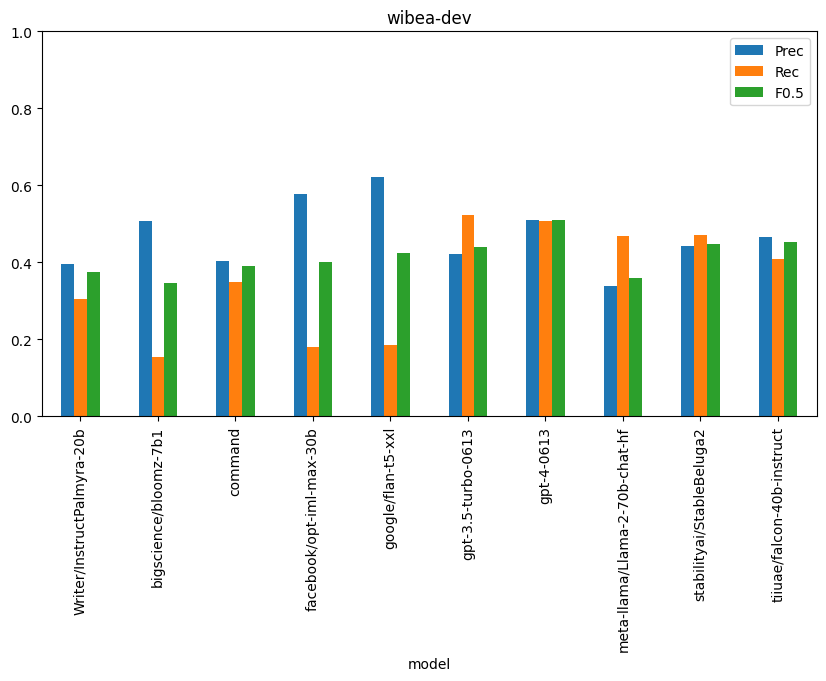

In [22]:
plot_precision_recall(df, 'wibea-dev')